In [71]:
import numpy as np
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dropout
from keras.utils import to_categorical
import matplotlib.pyplot as plt
import time
import pandas as pd

In [72]:
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype("float32")
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype("float32")
print(X_train.shape)
print(Y_train.shape)

(60000, 28, 28, 1)
(60000,)


In [73]:
# X_train = X_train / 255
# X_test = X_test / 255

In [74]:
Y_train = to_categorical(Y_train)
Y_test = to_categorical(Y_test)

In [75]:
model = Sequential()
model.add(Conv2D(9, kernel_size=(5, 5), padding="same",
                 input_shape=(28,28,1), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(16, kernel_size=(5, 5), padding="same",
                 activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.4))
model.add(Flatten())
model.add(Dense(128, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation="softmax"))
model.compile(loss="categorical_crossentropy", optimizer="adam",
              metrics=["accuracy"])
model.summary()  

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 28, 28, 9)         234       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 14, 14, 9)         0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 14, 14, 16)        3616      
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 7, 7, 16)          0         
_________________________________________________________________
dropout_12 (Dropout)         (None, 7, 7, 16)          0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 128)              

In [76]:
t1 = time.monotonic()
history = model.fit(X_train, Y_train, validation_split=0.2,
                    epochs=10, batch_size=128, verbose=1)
t2 = time.monotonic()
print(f"time:{t1-t2} sec")
model.save("mnist.h5")

Epoch 1/10
375/375 [==============================] - 36s 95ms/step - loss: 6.3822 - accuracy: 0.4566 - val_loss: 0.2315 - val_accuracy: 0.9333
Epoch 2/10
375/375 [==============================] - 35s 94ms/step - loss: 0.4865 - accuracy: 0.8488 - val_loss: 0.1396 - val_accuracy: 0.9592
Epoch 3/10
375/375 [==============================] - 36s 95ms/step - loss: 0.3268 - accuracy: 0.9006 - val_loss: 0.0962 - val_accuracy: 0.9705
Epoch 4/10
375/375 [==============================] - 36s 95ms/step - loss: 0.2550 - accuracy: 0.9245 - val_loss: 0.0907 - val_accuracy: 0.9764
Epoch 5/10
375/375 [==============================] - 36s 95ms/step - loss: 0.2055 - accuracy: 0.9374 - val_loss: 0.0750 - val_accuracy: 0.9777
Epoch 6/10
375/375 [==============================] - 36s 96ms/step - loss: 0.1787 - accuracy: 0.9454 - val_loss: 0.0671 - val_accuracy: 0.9813
Epoch 7/10
375/375 [==============================] - 36s 96ms/step - loss: 0.1618 - accuracy: 0.9514 - val_loss: 0.0657 - val_accuracy:

In [77]:
loss, accuracy = model.evaluate(X_train, Y_train)
print("訓練資料集的準確度 = {:.2f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, Y_test)
print("測試資料集的準確度 = {:.2f}".format(accuracy))

1875/1875 [==============================] - 22s 12ms/step - loss: 0.0400 - accuracy: 0.9882
訓練資料集的準確度 = 0.99
313/313 [==============================] - 4s 12ms/step - loss: 0.0450 - accuracy: 0.9861
測試資料集的準確度 = 0.99


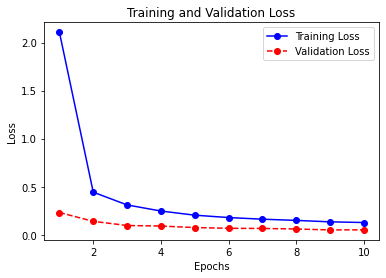

In [78]:
loss = history.history["loss"]
epochs = range(1, len(loss)+1)
val_loss = history.history["val_loss"]
plt.plot(epochs, loss, "bo-", label="Training Loss")
plt.plot(epochs, val_loss, "ro--", label="Validation Loss")
plt.title("Training and Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

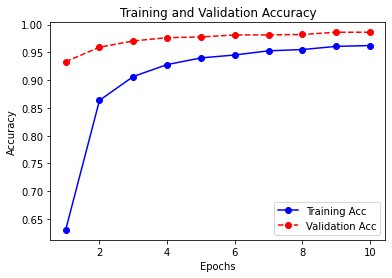

In [79]:
acc = history.history["accuracy"]
epochs = range(1, len(acc)+1)
val_acc = history.history["val_accuracy"]
plt.plot(epochs, acc, "bo-", label="Training Acc")
plt.plot(epochs, val_acc, "ro--", label="Validation Acc")
plt.title("Training and Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


(10000,)
(10000,)
(10000, 10)


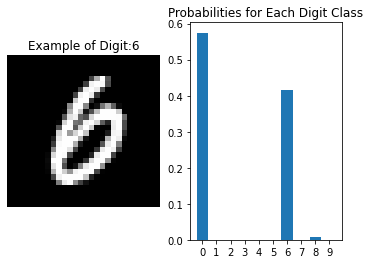

In [80]:
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype("float32")

Y_pred = model.predict_classes(X_test)  # 分類
Y_probs = model.predict_proba(X_test)   # 機率
print(Y_test.shape)
print(Y_pred.shape)
print(Y_probs.shape)
df = pd.DataFrame({"label":Y_test, "predict":Y_pred})
df = df[Y_test!=Y_pred]  # 篩選出分類錯誤的資料
i = df.sample(n=1).index.values.astype(int)[0]
digit = X_test[i].reshape(28, 28) 

plt.figure()
plt.subplot(1,2,1)
plt.title("Example of Digit:" + str(Y_test[i]))
plt.imshow(digit, cmap="gray")
plt.axis("off")
plt.subplot(1,2,2)
plt.title("Probabilities for Each Digit Class")
plt.bar(np.arange(10), Y_probs[i].reshape(10), align="center")
plt.xticks(np.arange(10),np.arange(10).astype(str))
plt.show()